## Objetivo del análisis

Obtener y analizar datos sobre la conducta de los usuarios para apoyar al departamento de marketing a decidir en qué, cuando y como deberían invertir el presupuesto para maximizar sus resultados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Cargar los datos y convertir las columnas de fecha y hora al formato correcto

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv',
                    dtype = {'Device':'category'},
                    parse_dates=['End Ts', 'Start Ts'])

orders = pd.read_csv('/datasets/orders_log_us.csv',
                     parse_dates=['Buy Ts'])

costs = pd.read_csv('/datasets/costs_us.csv',
                    parse_dates=['dt'])

### Verificar los tipos de datos

In [3]:
print(visits.info())
print(orders.info())
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entr

### Vamos a estandarizar los nombres de las columnas para que sea mucho más sencillo trabajar con ellas.

In [4]:
def standardize_column_names(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

visits = standardize_column_names(visits)
costs = standardize_column_names(costs)
orders = standardize_column_names(orders)

# Verificamos los cambios en los nombres de las columnas
print(visits.columns)
print(costs.columns)
print(orders.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Index(['source_id', 'dt', 'costs'], dtype='object')
Index(['buy_ts', 'revenue', 'uid'], dtype='object')


## Informes y cálculo de métricas

### Visitas
a) ¿Cuántas personas usan el servicio cada día, semana y mes?

Vamos a calcular el DAU, WAU y MAU.

In [5]:
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_month'] = visits['start_ts'].dt.month
visits['session_year'] = visits['start_ts'].dt.year

visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017


#### DAU

In [6]:
dau = visits.groupby(['session_date'])['uid'].nunique().reset_index()
dau.columns = ['session_date', 'user_numbers']
print(dau.user_numbers.mean())
dau.head()

907.9917582417582


,session_date,user_numbers
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


c:\Users\jafet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jafet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='session_date', ylabel='user_numbers'>

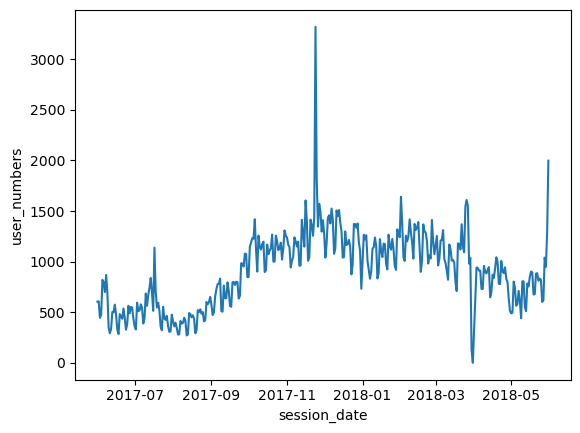

In [7]:
sns.lineplot(data = dau, x = 'session_date', y = 'user_numbers')

#### WAU

In [8]:
wau = visits.groupby(['session_year', 'session_week'])['uid'].nunique().reset_index()
wau.columns = ['session_year', 'session_week', 'user_numbers']
print(wau.user_numbers.mean())
wau.head()

5716.245283018868


,session_year,session_week,user_numbers
0,2017,22,2021
1,2017,23,4129
2,2017,24,2812
3,2017,25,2878
4,2017,26,3064


<Axes: xlabel='session_week', ylabel='user_numbers'>

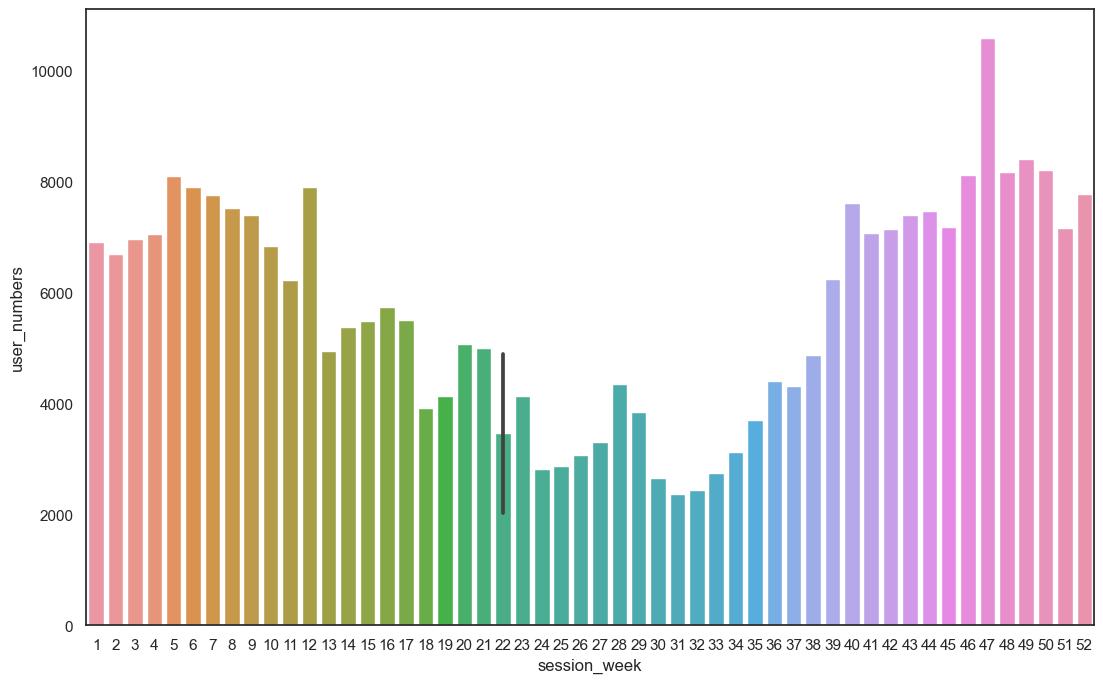

In [80]:
plt.figure(figsize=(13, 8))
sns.barplot(data = wau, x = 'session_week', y = 'user_numbers')



#### MAU

In [10]:
mau = visits.groupby(['session_year', 'session_month'])['uid'].nunique().reset_index()
mau.columns = ['session_year', 'session_month', 'user_numbers']
print(mau.user_numbers.mean())
mau.head()

23228.416666666668


,session_year,session_month,user_numbers
0,2017,6,13259
1,2017,7,14183
2,2017,8,11631
3,2017,9,18975
4,2017,10,29692


<Axes: xlabel='session_month', ylabel='user_numbers'>

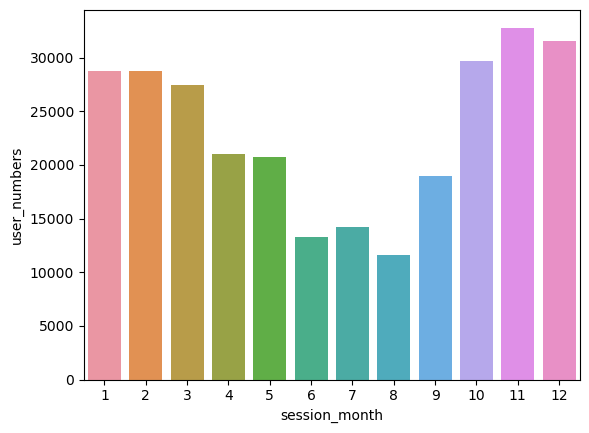

In [11]:
sns.barplot(data = mau, x = 'session_month', y = 'user_numbers')

Los primeros resultados del análisis muestran lo siguiente:

- Usuarios diarios: Alrededor de 600 usuarios únicos por día al principio del periodo.
- Usuarios semanales: Comienzan con más de 2,000 usuarios únicos en la primera semana, aumentando gradualmente en semanas posteriores.
- Usuarios mensuales: Junio de 2017, tiene 13,259 usuarios únicos, incrementándose en los meses siguientes.

b) ¿Cuántas sesiones hay por día?

Ahora, calculamos el número de sesiones totales por día, ya que un mismo usuario puede tener múltiples sesiones.

In [12]:
sessions_per_user = visits.groupby(['session_date']).agg(
                                    n_sessions = ('uid', 'count'),
                                    n_users = ('uid', 'nunique')
                                    )

sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions']/sessions_per_user['n_users']

sessions_per_user


,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


Los resultados muestran que:

El número de sesiones por día varía, alrededor de 600-900 sesiones diarias en los primeros días del análisis.

c) ¿Cuál es la duración de cada sesión?

Ahora calculamos la duración promedio de las sesiones en minutos.

In [13]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60


visits[['start_ts', 'end_ts', 'session_duration']].head(), print(visits['session_duration'].mean())

10.717094787608978


(             start_ts              end_ts  session_duration
 0 2017-12-20 17:20:00 2017-12-20 17:38:00              18.0
 1 2018-02-19 16:53:00 2018-02-19 17:21:00              28.0
 2 2017-07-01 01:54:00 2017-07-01 01:54:00               0.0
 3 2018-05-20 10:59:00 2018-05-20 11:23:00              24.0
 4 2017-12-27 14:06:00 2017-12-27 14:06:00               0.0,
 None)

<Axes: >

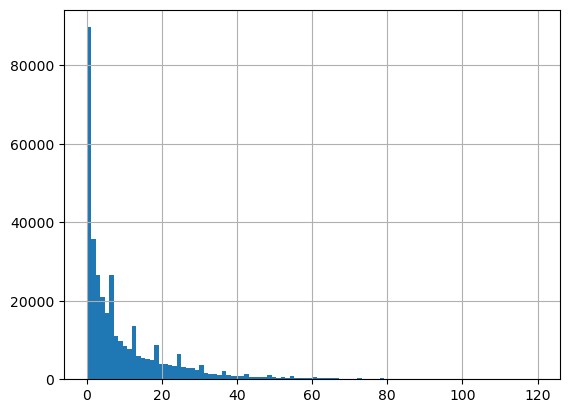

In [14]:
visits['session_duration'].hist(bins = 100, range = (0, 120))

La duración promedio de las sesiones es de 10.7 minutos, pero al observar la gráfica vemos que la gran mayoría de sesiones no duran ni un minuto.

d) ¿Con qué frecuencia los usuarios y las usuarias regresan?

Debemos calcular el sticky factor.

In [15]:
sticky_wau = (dau.user_numbers.mean()/ wau.user_numbers.mean())*100

sticky_mau = (dau.user_numbers.mean()/ mau.user_numbers.mean())*100

print(f'Para la audiencia semanal, el factor de adherencia es:', sticky_wau)
print(f'Para la audiencia mensual, el factor de adherencia es:', sticky_mau)

Para la audiencia semanal, el factor de adherencia es: 15.88440861589881
Para la audiencia mensual, el factor de adherencia es: 3.908969652437603


### Ventas
Ahora analizaremos las ventas, desde la conversión de usuarios hasta la cantidad de pedidos y el LTV.

a) ¿Cuándo los usuarios comienzan a comprar?
El objetivo es calcular el tiempo que transcurre entre la primera visita y la primera compra de un usuario. Esto te permitirá analizar el tiempo de conversión desde la visita hasta la compra (en días).

Primero, necesitamos unir los datos de visitas y pedidos basándonos en el identificador único del usuario (Uid).

In [16]:
first_activity_date = visits.groupby('uid')['start_ts'].min()
first_activity_date.name = 'first_activity_date'
first_activity_date

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: first_activity_date, Length: 228169, dtype: datetime64[ns]

In [17]:
cohorts_visits = visits[['device', 'end_ts', 'source_id', 'start_ts', 'uid']]

In [18]:
cohorts_visits = cohorts_visits.join(first_activity_date, on = 'uid')
cohorts_visits

,device,end_ts,source_id,start_ts,uid,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00
...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29 19:07:00
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00


In [19]:
test_date = cohorts_visits['start_ts'][0]
test_date.date().replace(day = 1)

datetime.date(2017, 12, 1)

In [20]:
cohorts_visits['session_start_month'] = cohorts_visits['start_ts'].apply(lambda x: x.date().replace(day=1))
cohorts_visits['first_activity_month'] = cohorts_visits['first_activity_date'].apply(lambda x: x.date().replace(day=1))

cohorts_visits['cohort_lifetime'] = (cohorts_visits['session_start_month'] - cohorts_visits['first_activity_month']) / np.timedelta64(30, 'D')
cohorts_visits['cohort_lifetime'] = cohorts_visits['cohort_lifetime'].round().astype(int)
cohorts_visits.head()

,device,end_ts,source_id,start_ts,uid,first_activity_date,session_start_month,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-05-01,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


In [21]:
cohorts_visits['cohort_lifetime'].mean()

0.9693767390094602

In [22]:
cohorts = cohorts_visits.groupby(['first_activity_month', 'cohort_lifetime'])['uid'].nunique().reset_index()

In [23]:
cohorts

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [24]:
initial_users = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users.columns = ['first_activity_month', 'initial_users']
initial_users

,first_activity_month,initial_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [25]:
cohorts = cohorts.merge(initial_users, on = 'first_activity_month')
cohorts['retention'] = cohorts['uid'] / cohorts['initial_users']
cohorts.head(5)

,first_activity_month,cohort_lifetime,uid,initial_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


In [26]:
cohorts = cohorts[cohorts['cohort_lifetime'] > 0]

In [27]:
retention_pivot = cohorts.pivot_table(
    index= 'first_activity_month',
    columns= 'cohort_lifetime',
    values= 'retention',
    aggfunc= 'sum'
)
retention_pivot

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,
2017-06-01,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


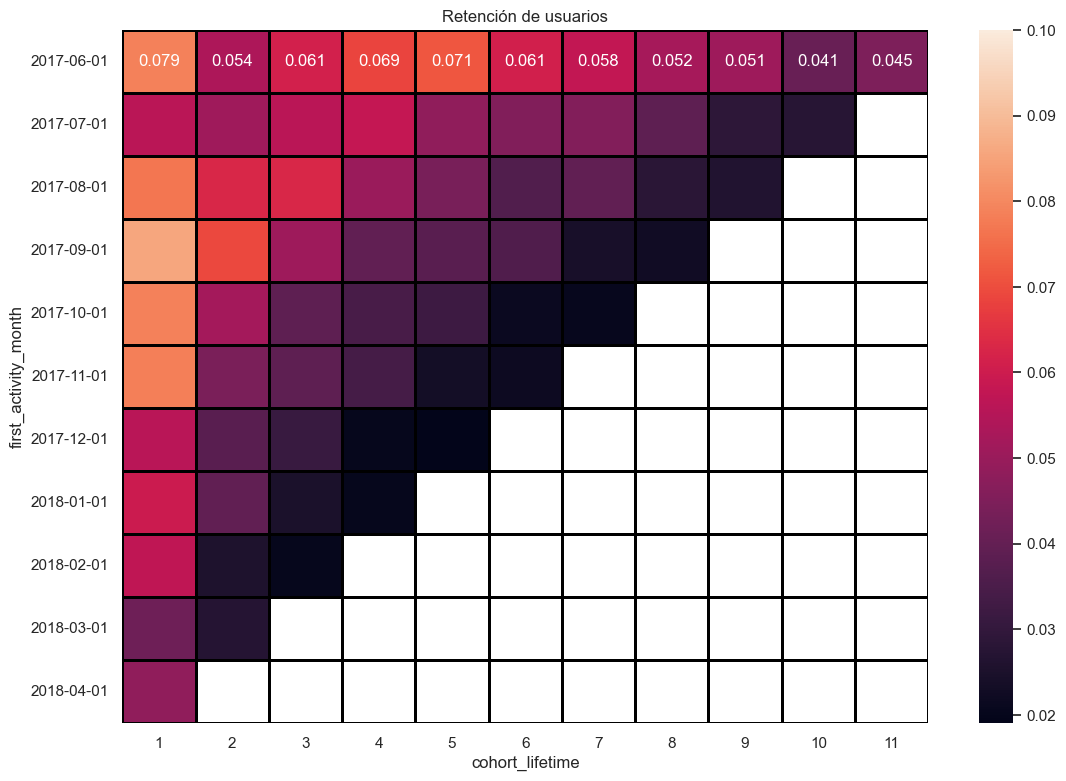

In [28]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Retención de usuarios')
sns.heatmap(
    retention_pivot, annot = True, fmt='.3f', linewidths=1, linecolor='black', vmax=0.1,
)
plt.show(block=False)

In [29]:
first_visit = visits.groupby('uid')['start_ts'].min()
first_purchase = orders.groupby('uid')['buy_ts'].min()
time_to_purchase = (first_purchase - first_visit).dt.days
time_to_purchase.mean()

16.7298688497659

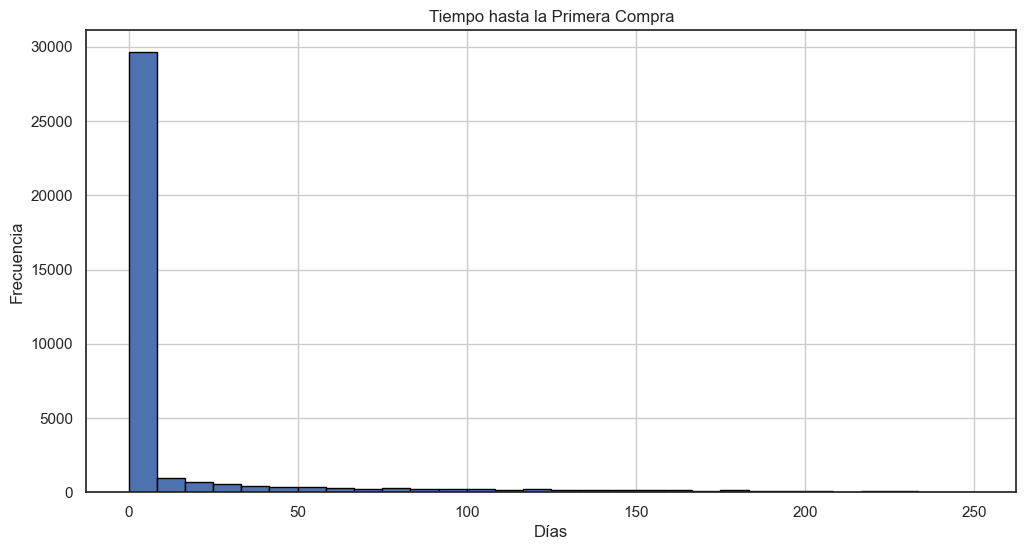

In [30]:
plt.figure(figsize=(12,6))
plt.hist(time_to_purchase.dropna(), bins=30, range= (0,250), edgecolor='black')
plt.title('Tiempo hasta la Primera Compra')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Podemos observar que el promedio de días que se toman los clientes para realizar su primera compra es de 16 días.

b) ¿Cuántos pedidos hacen los usuarios durante un periodo de tiempo?

Podemos calcular el número total de pedidos realizados por los usuarios y luego desglosarlo por mes para observar el comportamiento de compra.

In [31]:
orders_per_user = orders.groupby('uid')['revenue'].count()

monthly_orders = orders.groupby(orders['buy_ts'].dt.to_period('M'))['revenue'].count()

monthly_orders

buy_ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
2018-06       1
Freq: M, Name: revenue, dtype: int64

c) ¿Cuál es el tamaño promedio de compra?

Para el tamaño promedio de compra, calculamos el promedio de los ingresos por pedido.

In [32]:
aov = orders['revenue'].mean()

aov

4.999646930477041

d) ¿Cuánto dinero aporta cada cliente?

El valor de vida del cliente (LTV) se calcula sumando los ingresos totales generados por un usuario a lo largo del tiempo

In [33]:
ltv_per_user = orders.groupby('uid')['revenue'].sum()

total_revenue = orders['revenue'].sum()
average_ltv = ltv_per_user.mean()

total_revenue, average_ltv

(252057.19999999998, 6.901327930345262)

### Marketing

a) ¿Cuánto dinero se gastó?

Primero, calculamos los gastos totales de marketing, tanto a lo largo del tiempo como por fuente de adquisición.

In [51]:
total_costs = costs['costs'].sum()
total_costs

329131.62

In [52]:
total_costs_by_source = costs.groupby('source_id')['costs'].sum()

daily_costs = costs.groupby('dt')['costs'].sum()

total_costs_by_source.head(), daily_costs.head()

(source_id
 1     20833.27
 2     42806.04
 3    141321.63
 4     61073.60
 5     51757.10
 Name: costs, dtype: float64,
 dt
 2017-06-01    735.26
 2017-06-02    721.19
 2017-06-03    450.85
 2017-06-04    761.16
 2017-06-05    821.44
 Name: costs, dtype: float64)

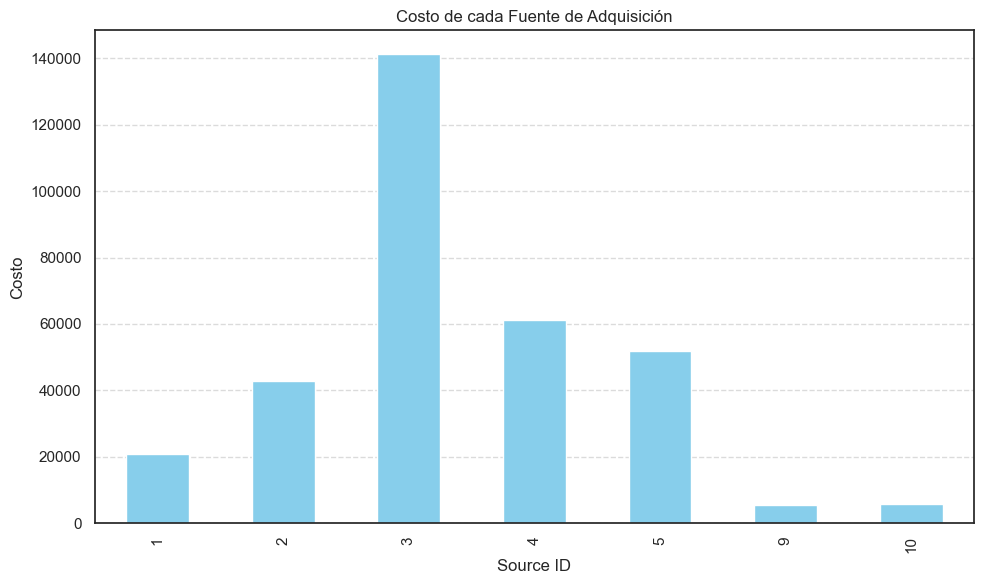

In [69]:
plt.figure(figsize=(10, 6))
total_costs_by_source.plot(kind='bar', color='skyblue')
plt.title('Costo de cada Fuente de Adquisición')
plt.xlabel('Source ID')
plt.ylabel('Costo')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

b) Costo de adquisición de clientes (CAC)

El CAC se calcula dividiendo los costos de marketing por el número de clientes adquiridos desde esa fuente.

In [78]:

merged_orders = pd.merge(orders, visits[['uid', 'source_id']], on='uid', how='left')

#Agrupar por Source Id para contar el número de clientes únicos por fuente
customers_by_source = merged_orders.groupby('source_id')['uid'].nunique()

#Calcular el gasto total de marketing por cada fuente
total_costs_per_source = costs.groupby('source_id')['costs'].sum()

#Calcular el Costo de Adquisición de Clientes (CAC)
CAC = total_costs_per_source / customers_by_source

CAC

source_id
1      2.918642
2      5.859828
3     10.206676
4      4.284965
5      5.096209
7           NaN
9      1.975471
10     3.283976
dtype: float64

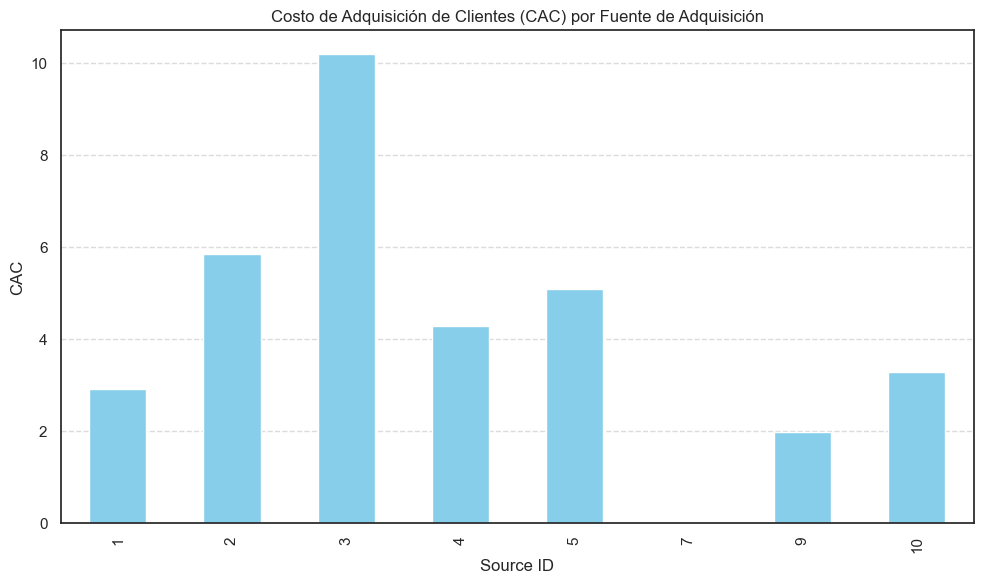

In [61]:
plt.figure(figsize=(10, 6))
CAC.plot(kind='bar', color='skyblue')
plt.title('Costo de Adquisición de Clientes (CAC) por Fuente de Adquisición')
plt.xlabel('Source ID')
plt.ylabel('CAC')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [68]:
# Verificar los gastos de marketing de la fuente 7
costs_source_7 = costs[costs['source_id'] == '7']['costs'].sum()
print("Gastos de marketing para source 7:", costs_source_7)

Gastos de marketing para source 7: 0.0


c) Retorno sobre la inversión en marketing (ROMI)

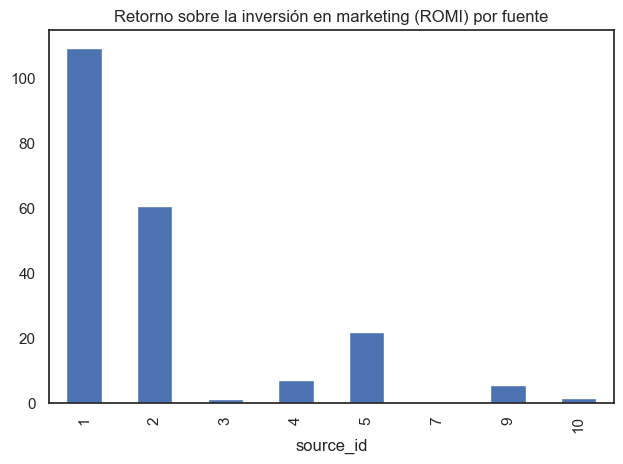

In [76]:
# Calcular los ingresos totales por fuente de adquisición
revenue_by_source = merged_orders.groupby('source_id')['revenue'].sum()

# Calcular el ROMI por fuente de adquisición
romi_by_source = (revenue_by_source - total_costs_per_source) / total_costs_per_source

romi_by_source.plot(kind='bar', title='Retorno sobre la inversión en marketing (ROMI) por fuente')
plt.tight_layout()
plt.show()

### Comparativa entre CAC y ROMI por fuente

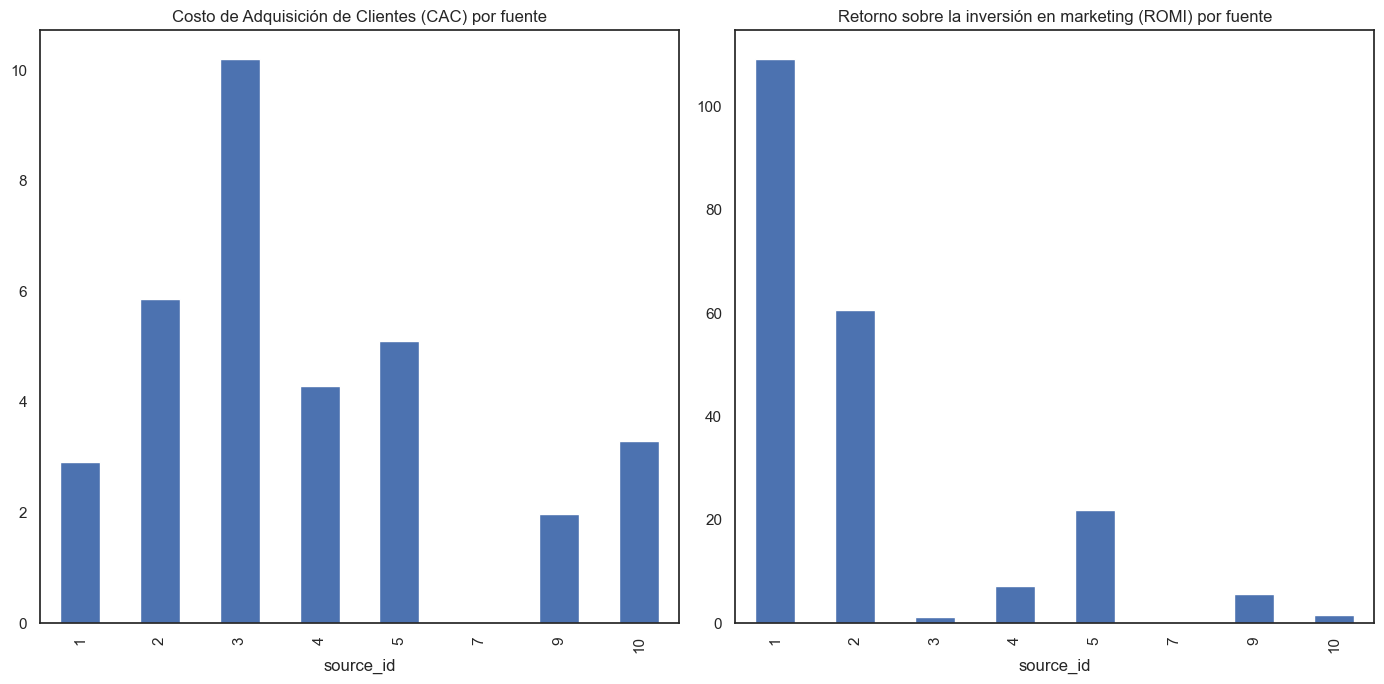

In [77]:
# Gráficas
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
CAC.plot(kind='bar', title='Costo de Adquisición de Clientes (CAC) por fuente')
plt.subplot(1, 2, 2)
romi_by_source.plot(kind='bar', title='Retorno sobre la inversión en marketing (ROMI) por fuente')
plt.tight_layout()
plt.show()

#### Fuente 1:
- Gasto total: $20,833.27
- Ingresos: $2,298,200.17
- Clientes: 18,999
- CAC: $2.92
- ROMI: 110.31

#### Fuente 2:
- Gasto total: $42,806.04
- Ingresos: $2,638,189.21
- Clientes: 26,245
- CAC: $5.86
- ROMI: 61.63

#### Fuente 3:
- Gasto total: $141,321.63
- Ingresos: $296,687.96
- Clientes: 74,756
- CAC: $10.21
- ROMI: 2.10

#### Fuente 4:
- Gasto total: $61,073.60
- Ingresos: $496,690.17
- Clientes: 83,525
- CAC: $4.28
- ROMI: 8.13

#### Fuente 5:
- Gasto total: $51,757.10
- Ingresos: $1,181,477.14
- Clientes: 56,974
- CAC: $5.10
- ROMI: 22.83

#### Fuente 9:
- Gasto total: $5,517.49
- Ingresos: $36,342.25
- Clientes: 9,264
- CAC: $1.98
- ROMI: 6.59

#### Fuente 10:
- Gasto total: $5,822.49
- Ingresos: $14,619.23
- Clientes: 8,067
- CAC: $3.28
- ROMI: 2.51

### Conclusión:

- Mejores fuentes según ROMI: Las fuentes 1 y 5 siguen siendo las más rentables. Además, tienen CAC relativamente bajos, lo que hace que sean las más atractivas para futuras inversiones.
- Menores costos de adquisición: Las fuentes 9 y 1 son las más eficientes en términos de CAC, mientras que la fuente 3 tiene el CAC más alto, lo que indica ineficiencia.

### Recomendaciones:
- Invertir más en las fuentes 1 y 5, ya que ofrecen un excelente balance entre bajo CAC y alto retorno.
- Escalar la inversión en la fuente 9, que tiene el menor CAC, lo que podría mejorar aún más su rentabilidad si se incrementa el gasto.
- Reevaluar la fuente 3, que tiene el CAC más alto y un ROMI bajo, lo que sugiere que los recursos asignados no se están utilizando eficientemente.